<a href="https://colab.research.google.com/github/RushiG02/ML/blob/master/sih11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/learn-uj/data/master/frwet.csv")
df.head()


,Unnamed: 0,utc_timestamp,FR_windspeed_10m,FR_temperature,FR_radiation_direct_horizontal,FR_radiation_diffuse_horizontal
0,0,1980-01-01T00:00:00Z,2.67,-0.537,0.0,0.0
1,1,1980-01-01T01:00:00Z,2.58,-0.489,0.0,0.0
2,2,1980-01-01T02:00:00Z,2.52,-0.391,0.0,0.0
3,3,1980-01-01T03:00:00Z,2.49,-0.354,0.0,0.0
4,4,1980-01-01T04:00:00Z,2.48,-0.354,0.0,0.0


In [0]:
df = df.rename(columns={"utc_timestamp": "tsp", "FR_windspeed_10m": "wind_speed","FR_temperature":"temperature","FR_radiation_direct_horizontal":"radiation_direct","FR_radiation_diffuse_horizontal":"radiation_diffuse"})

In [0]:
df["tsp"] = pd.to_datetime(df["tsp"])
df['tsp'] = df['tsp'].dt.tz_convert(None)

In [0]:
df.head()

,Unnamed: 0,tsp,wind_speed,temperature,radiation_direct,radiation_diffuse
0,0,1980-01-01 00:00:00,2.67,-0.537,0.0,0.0
1,1,1980-01-01 01:00:00,2.58,-0.489,0.0,0.0
2,2,1980-01-01 02:00:00,2.52,-0.391,0.0,0.0
3,3,1980-01-01 03:00:00,2.49,-0.354,0.0,0.0
4,4,1980-01-01 04:00:00,2.48,-0.354,0.0,0.0


In [0]:
df1 = df[["tsp","wind_speed"]]
df2 = df[["tsp","temperature"]]
df3 = df[["tsp","radiation_direct"]]
df4 = df[["tsp","radiation_diffuse"]]

In [0]:
df1 = df1.rename(columns={"tsp":"ds","wind_speed":"y"})
df2 = df2.rename(columns={"tsp":"ds","temperature":"y"})
df3 = df3.rename(columns={"tsp": "ds", "radiation_direct": "y"})

df4 = df4.rename(columns={"tsp": "ds", "radiation_diffuse": "y"})

In [0]:
A = Prophet()
B = Prophet()
C = Prophet()
D = Prophet()

A.fit(df1)
B.fit(df2)
C.fit(df3)
D.fit(df4)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [0]:
future = A.make_future_dataframe(periods=8784*4,freq="H")
future.tail()

,ds
359491,2021-01-03 19:00:00
359492,2021-01-03 20:00:00
359493,2021-01-03 21:00:00
359494,2021-01-03 22:00:00
359495,2021-01-03 23:00:00


In [0]:
forecast1 = A.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
359491,2021-01-03 19:00:00,4.458268,2.364952,6.382399
359492,2021-01-03 20:00:00,4.379478,2.295662,6.280401
359493,2021-01-03 21:00:00,4.355872,2.328837,6.250278
359494,2021-01-03 22:00:00,4.350728,2.113627,6.289001
359495,2021-01-03 23:00:00,4.338620,2.312649,6.366856


In [0]:
forecast1.to_csv(path_or_buf="/content/wind_speed_predict.csv")

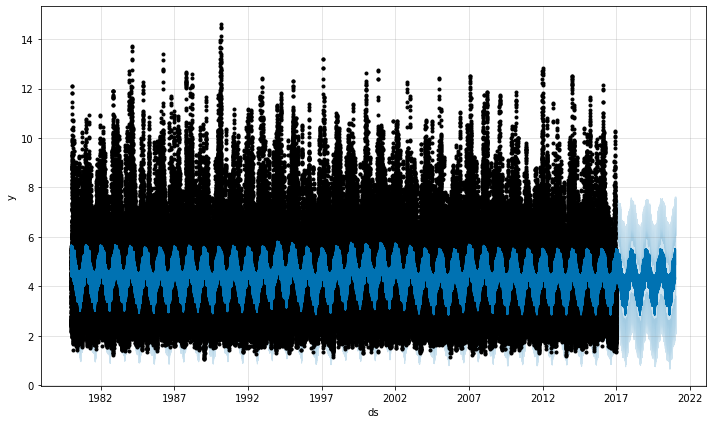

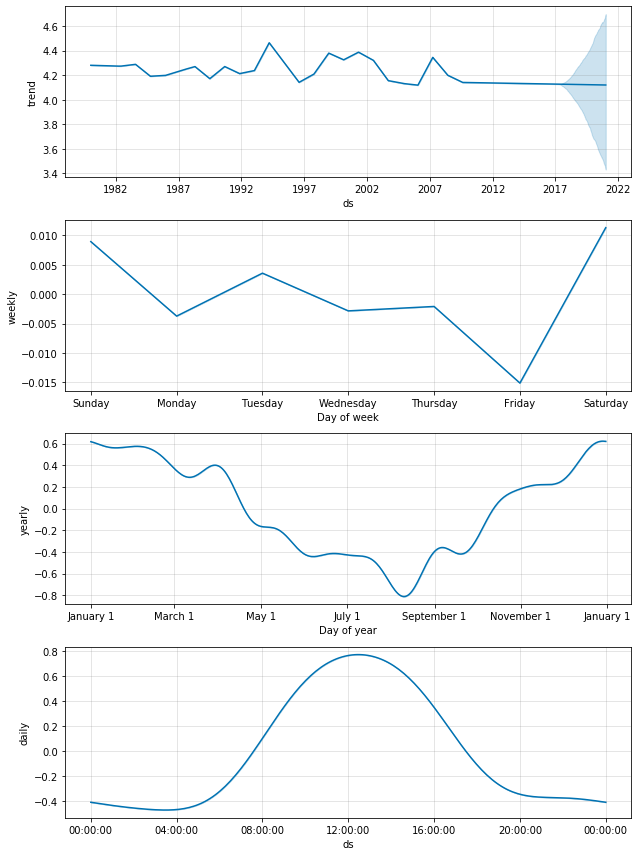

In [0]:
fig1 = A.plot(forecast1)
fig2 = A.plot_components(forecast1)

In [0]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01 00:00:00,4.280696,2.644141,6.344566,4.280696,4.280696,0.216509,0.216509,0.216509,-0.406880,-0.406880,-0.406880,0.003568,0.003568,0.003568,0.619820,0.619820,0.619820,0.0,0.0,0.0,4.497204
1,1980-01-01 01:00:00,4.280696,2.547559,6.228592,4.280696,4.280696,0.190998,0.190998,0.190998,-0.432060,-0.432060,-0.432060,0.003340,0.003340,0.003340,0.619718,0.619718,0.619718,0.0,0.0,0.0,4.471694
2,1980-01-01 02:00:00,4.280695,2.479252,6.372186,4.280695,4.280695,0.169990,0.169990,0.169990,-0.452694,-0.452694,-0.452694,0.003069,0.003069,0.003069,0.619615,0.619615,0.619615,0.0,0.0,0.0,4.450685
3,1980-01-01 03:00:00,4.280695,2.584243,6.390669,4.280695,4.280695,0.155857,0.155857,0.155857,-0.466413,-0.466413,-0.466413,0.002759,0.002759,0.002759,0.619511,0.619511,0.619511,0.0,0.0,0.0,4.436552
4,1980-01-01 04:00:00,4.280695,2.507034,6.306844,4.280695,4.280695,0.156926,0.156926,0.156926,-0.464895,-0.464895,-0.464895,0.002416,0.002416,0.002416,0.619405,0.619405,0.619405,0.0,0.0,0.0,4.437621


In [0]:
forecast1 = forecast1.shift(-300000)
forecast1 = forecast1.dropna()

NameError: ignored

In [0]:
temp1 = temp.shift(-200000)
temp1.dropna()

,ds,yhat,yhat_lower,yhat_upper
0,2014-03-23 00:00:00,4.095667,2.285456,5.942499
1,2014-03-23 01:00:00,4.069761,2.128549,5.943072
2,2014-03-23 02:00:00,4.048397,2.101287,6.017731
3,2014-03-23 03:00:00,4.033951,1.983148,5.980562
4,2014-03-23 04:00:00,4.034758,1.923107,5.815898
...,...,...,...,...
59491,2021-01-03 19:00:00,4.458268,2.364952,6.382399
59492,2021-01-03 20:00:00,4.379478,2.295662,6.280401
59493,2021-01-03 21:00:00,4.355872,2.328837,6.250278
59494,2021-01-03 22:00:00,4.350728,2.113627,6.289001


In [0]:
forecast2 = B.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [0]:
forecast1.to_csv(path_or_buf="/content/wind_speed_predict.csv")
forecast2.to_csv(path_or_buf="/content/temperature_predict.csv")